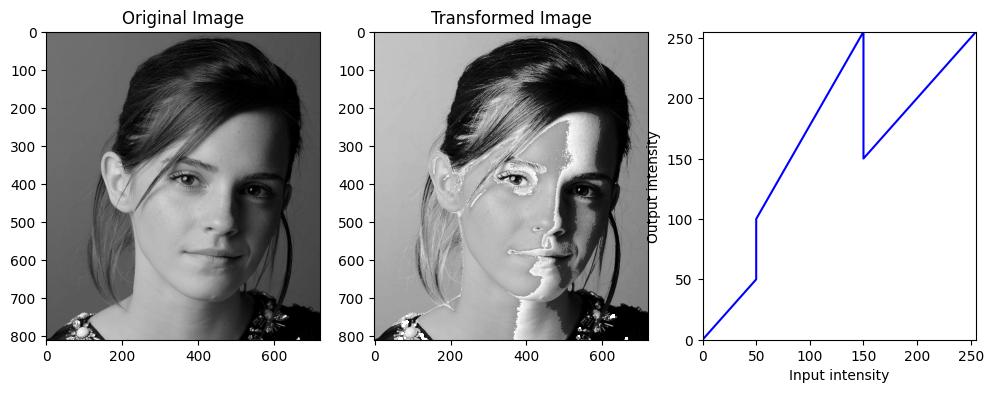

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image1 = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)  # Load in grayscale
assert image1 is not None
figure, ax = plt.subplots(1,3, figsize = (12,4))
ax[0].imshow(image1, cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original Image")



# Define the intensity transformation function based on the given plot
def intensity_transform(value):
    if value < 50:
        return value  # Linear for [0, 50)
    elif value < 150:
        return (1.55*value +22.5) # Linear for [50, 150)
    elif value < 255:
        return value    # Mapping 100-150 to 255


# Apply the transformation to each pixel in the image
transformed_image = np.vectorize(intensity_transform)(image1)

ax[1].set_title("Transformed Image")
ax[1].imshow(transformed_image, cmap='gray')

# Define input intensity levels
input_intensity = [0, 50, 50, 150, 150, 255]

# Define corresponding output intensity levels
output_intensity = [0, 50, 100, 255, 150, 255]

# Create the plot

plt.plot(input_intensity, output_intensity, color='blue')

# Add labels
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

# Set axis limits
plt.xlim(0, 255)
plt.ylim(0, 255)

# Show the plot
plt.grid(False)
plt.show()



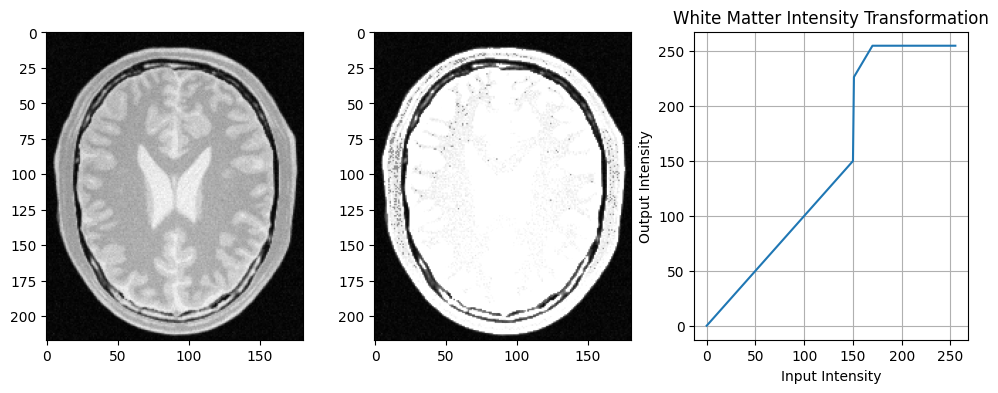

In [31]:
image2 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
fig , ax = plt.subplots(1,3, figsize = (12,4))
ax[0].imshow(image2, cmap = 'gray')
# Define intensity transformation functions for white matter and gray matter
def accentuate_white_matter(value):
    if value > 150:  # Example range for white matter
        return min(255, value * 1.5)  # Stretch intensity
    return value

white_matter = np.vectorize(accentuate_white_matter)(image2)
ax[1].imshow(white_matter, cmap = 'gray')
# Plot intensity transformation for white matter
input_intensity = np.arange(256)
output_intensity_white = [accentuate_white_matter(i) for i in input_intensity]
plt.plot(input_intensity, output_intensity_white, label="White Matter")
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('White Matter Intensity Transformation')
plt.grid(True)
plt.show()

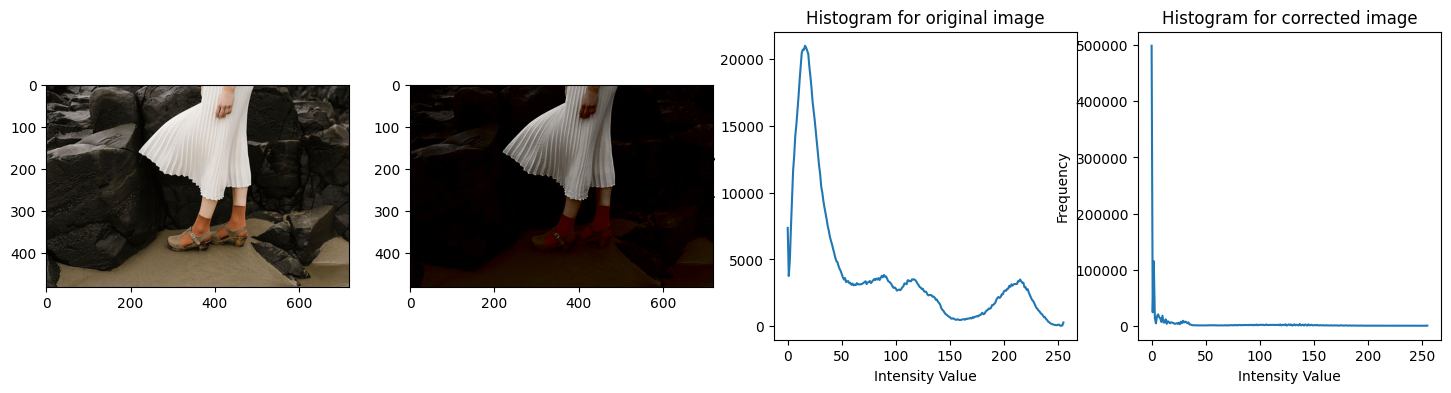

In [41]:
image3 = cv.imread('highlights_and_shadows.jpg')
cvt_img = cv.cvtColor(image3, cv.COLOR_BGR2Lab)
fig, ax = plt.subplots(1,4, figsize = (18,4))
L,a,b = cv.split(cvt_img)
# Apply gamma correction to the L channel
gamma = 4  # You can modify the gamma value
L_float = L / 255.0  # Normalize to [0, 1]
L_gamma_corrected = np.power(L_float, gamma) * 255  # Gamma correction
L_gamma_corrected = np.uint8(L_gamma_corrected)

# Merge the corrected L with original a, b channels
lab_gamma_corrected = cv.merge([L_gamma_corrected, a, b])

# Convert back to BGR color space
corrected_image = cv.cvtColor(lab_gamma_corrected, cv.COLOR_LAB2BGR)

#plot histogram for original image
hist1, bins = np.histogram(image3.ravel(), 256, [0, 256])

#plot histogram for corrected image
hist2, bins = np.histogram(corrected_image.ravel(), 256, [0, 256])
ax[0].imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
#ax[1].imshow(corrected_image)
ax[1].imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
ax[2].plot(hist1)
ax[2].set_title('Histogram for original image')
ax[2].set_xlabel('Intensity Value')
ax[2].set_ylabel('Frequency')

ax[3].plot(hist2)
ax[3].set_title('Histogram for corrected image')
ax[3].set_xlabel('Intensity Value')
ax[3].set_ylabel('Frequency')
plt.show()

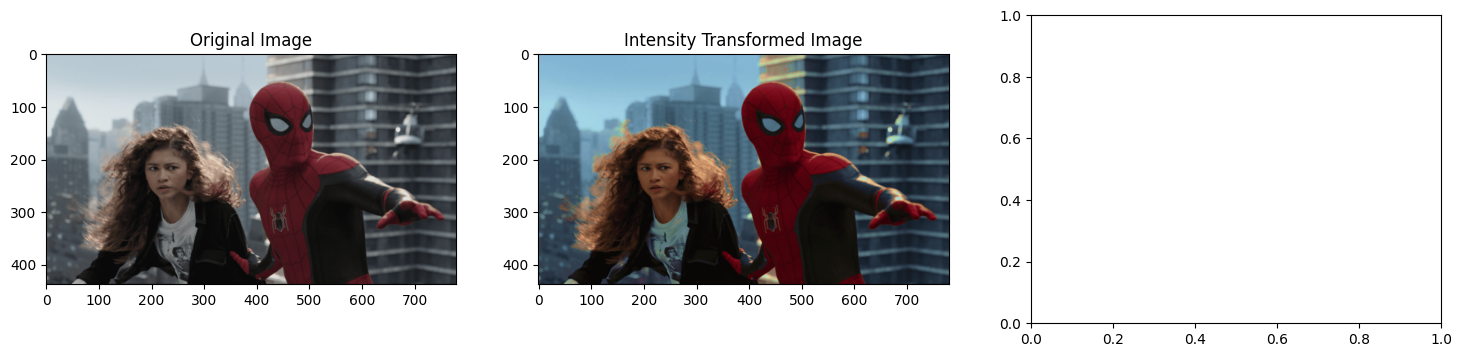

In [46]:
a = 0.5
sigma = 70

#load the image
image4 = cv.imread('spider.png')

#convert image to hsv type
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)
#split the image
hue, saturation, value = cv.split(hsv_image)
saturation_transform = np.minimum(saturation + a* 128* np.exp(-((saturation- 128)**2)/(2* sigma**2)), 255)

# Convert the result back to an 8-bit format
saturation_transformed = np.uint8(saturation_transform)

hsv_transform = cv.merge([hue, saturation_transformed, value])
# Convert back to BGR color space for display
image_transformed = cv.cvtColor(hsv_transform, cv.COLOR_HSV2BGR)

fig, ax = plt.subplots(1,3, figsize = (18,4))
ax[0].imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformed Image')
plt.show()